In [113]:
import tensorflow as tf
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
import torch
import numpy as np
import time
import functools
import PIL
import torchvision.transforms as transforms 
from google.colab import drive
import tensorflow_hub as hub

mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False
drive.mount('/content/drive')
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
content_img = PIL.Image.open('/content/drive/MyDrive/ssafy/woman.jpg')
style_img = PIL.Image.open('/content/drive/MyDrive/ssafy/woman3.jpg')

In [115]:
# tfs = transforms.ToTensor()
# temp = tfs(content_img)

# img = np.array(content_img)

# r = img[:, :, 0]
# g = img[:, :, 1]
# b = img[:, :, 2]
# gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

# gray_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
# gray_img[:, :, 0] = gray
# gray_img[:, :, 1] = gray
# gray_img[:, :, 2] = gray

# content_img = PIL.Image.fromarray(gray_img)
# # content_img.show()
# # b = tfs(content_img)
# # print(b.size())

In [116]:
def preprocess_image(image, target_dim):
  # Resize the image so that the shorter dimension becomes 256px.
  shape = tf.cast(tf.shape(image)[1:-1], tf.float32)
  short_dim = min(shape)
  scale = target_dim / short_dim
  new_shape = tf.cast(shape * scale, tf.int32)
  image = tf.image.resize(image, new_shape)

  # Central crop the image.
  image = tf.image.resize_with_crop_or_pad(image, target_dim, target_dim)

  return image

content_image = tf.image.convert_image_dtype(content_img, tf.float32)
content_image = content_image[tf.newaxis, :]
style_image = tf.image.convert_image_dtype(style_img, tf.float32)
style_image = style_image[tf.newaxis, :]

# Preprocess the input images.
preprocessed_content_image = preprocess_image(content_image, 384)
preprocessed_style_image = preprocess_image(style_image, 256)

In [117]:
outputs = hub_module(tf.constant(preprocessed_content_image), tf.constant(preprocessed_style_image))
stylized_image = outputs[0]

img = tf.squeeze(stylized_image, axis = 0)
img_t = tf.keras.preprocessing.image.array_to_img(img)
img_t.save('/content/drive/MyDrive/ssafy/result.jpg')

In [118]:
def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()

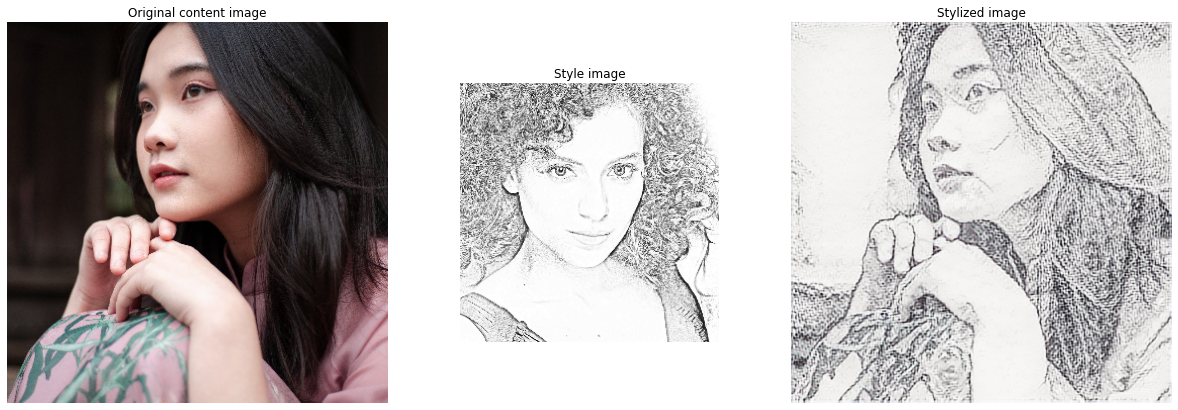

In [119]:
show_n([preprocessed_content_image, preprocessed_style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])